In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

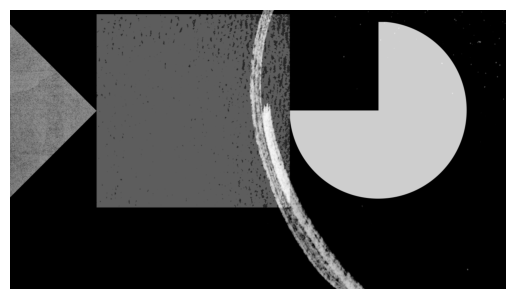

In [91]:
# Carga la imagen
circlecol = cv2.imread('../../IMAGES/1674674548143.png', 1)
circleC = cv2.cvtColor(circlecol, cv2.COLOR_BGR2RGB)

circle = cv2.imread('../../IMAGES/1674674548143.png', 0)

# Mostrar la imagen
plt.axis("off")
plt.imshow(circle, cmap='gray')

## CONECTIVIDAD 8

In [92]:
# Función que recibe como parámetro una imagen en escala de grises y regresa su borde (como imagen) y lista de direcciones con conectividad 8
def MooreFree8(circle):
    
    ############################### Binarizar #####################################
    # Binarizacion
    _, imgBin = cv2.threshold(circle, 90, 255, cv2.THRESH_BINARY)

    # Erosion(1), dilatacion(2) para eliminar ruido
    kernel = np.ones((5,5), np.uint8)
    img_erosion = cv2.erode(imgBin, kernel, iterations=1)
    test1 = cv2.dilate(img_erosion, kernel, iterations=2)
    
    ###################################### Punto de inicio y punto final #####################
    # Obtener dimensiones de la imagen
    dimensiones = test1.shape

    # Concatenar con una fila mas
    nfila = np.ones((1,dimensiones[1]))
    test = np.concatenate((test1, nfila))

    tupla = ()
    # Encontrar el valor inicial
    for i in range (dimensiones[0]):
        for j in range (dimensiones[1]):
            if test[i][j] == 0:
                tupla = (i,j)
                break
        else:
            continue
        break

    # Encontrar punto final (en sentido antihorario desde el punto de inicio8)
    end = 0
    final = ()
    while end == 0:
        
        # Izquierda abajo
        fil = tupla[0] + (1)
        col = tupla[1] + (-1)
        if test[fil, col] == 0:
            final = fil, col
            end = 1
            break

        # Abajo
        fil = tupla[0] + (1)
        col = tupla[1] + (0)
        if test[fil, col] == 0:
            final = fil, col
            end = 1
            break

        # Derecha abajo
        fil = tupla[0] + (1)
        col = tupla[1] + (1)
        if test[fil, col] == 0:
            final = fil, col
            end = 1
            break
    
    ######################################## Moore y freeman #########################################
    # Obtener dimensiones de la imagen
    dimensiones = test.shape
    
    # funcion8 que indica direccion
    funcion8 = 1

    # Nueva imagen llena de 0's para dibujar borde
    base8 = np.zeros(dimensiones)

    # Lista que guarda direcciones8
    direcciones8 = []

    # Inicializacion
    inicio = tupla

    # Pintar el primer punto (inicio) como parte del borde
    base8[inicio] = 255

    # Nuevo inicio (el que se ira recorriendo)
    ninicio8 = inicio

    # Mientras el nuevo inicio (punto actual) sea diferente del punto final (condicion de paro: Cuando se haya llegado al punto final)
    while ninicio8 != final:
        
        # Imprimir punto actual
        #print(ninicio8)
        
        
        if funcion8 == 1:
            
            # Derecha arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (1)
            val = 1
            if test[fil, col] == 0:
                direcciones8.append(val)
                ninicio8 = fil, col
                base8[ninicio8] = 255
                #print(val)
                funcion8 = 8
                continue
            
            # Derecha
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 1
                continue
                
            # Derecha abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (1)
            val = 7
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 2
                continue
                
            # Abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (0)
            val = 6
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 3
                continue
                
            # Izquierda abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (-1)
            val = 5
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 4
                continue
            
            
        if funcion8 == 2:
            
            # Derecha arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (1)
            val = 1
            if test[fil, col] == 0:
                direcciones8.append(val)
                ninicio8 = fil, col
                base8[ninicio8] = 255
                #print(val)
                funcion8 = 8
                continue
            
            # Derecha
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 1
                continue
                
            # Derecha abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (1)
            val = 7
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 2
                continue
                
            # Abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (0)
            val = 6
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 3
                continue
                
            # Izquierda abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (-1)
            val = 5
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 4
                continue

            # Izquierda
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (-1)
            val = 4
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 5
                continue
            
            
        if funcion8 == 3:
            
            # Derecha abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (1)
            val = 7
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 2
                continue
                
            # Abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (0)
            val = 6
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 3
                continue
                
            # Izquierda abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (-1)
            val = 5
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 4
                continue

            # Izquierda
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (-1)
            val = 4
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 5
                continue

            # Izquierda arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (-1)
            val = 3
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 6
                continue
            
            
        if funcion8 == 4:
            
            # Derecha abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (1)
            val = 7
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 2
                continue
                
            # Abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (0)
            val = 6
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 3
                continue
                
            # Izquierda abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (-1)
            val = 5
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 4
                continue

            # Izquierda
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (-1)
            val = 4
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 5
                continue

            # Izquierda arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (-1)
            val = 3
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 6
                continue

            # Arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (0)
            val = 2
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 7
                continue
            
            
        if funcion8 == 5:
            
            # Izquierda abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (-1)
            val = 5
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 4
                continue

            # Izquierda
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (-1)
            val = 4
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 5
                continue

            # Izquierda arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (-1)
            val = 3
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 6
                continue

            # Arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (0)
            val = 2
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 7
                continue

            # Derecha arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (1)
            val = 1
            if test[fil, col] == 0:
                direcciones8.append(val)
                ninicio8 = fil, col
                base8[ninicio8] = 255
                #print(val)
                funcion8 = 8
                continue
            
            
        if funcion8 == 6:
            
            # Izquierda abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (-1)
            val = 5
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 4
                continue

            # Izquierda
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (-1)
            val = 4
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 5
                continue

            # Izquierda arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (-1)
            val = 3
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 6
                continue

            # Arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (0)
            val = 2
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 7
                continue

            # Derecha arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (1)
            val = 1
            if test[fil, col] == 0:
                direcciones8.append(val)
                ninicio8 = fil, col
                base8[ninicio8] = 255
                #print(val)
                funcion8 = 8
                continue
            
            # Derecha
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 1
                continue
            
            
        if funcion8 == 7:
            
            # Izquierda arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (-1)
            val = 3
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 6
                continue

            # Arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (0)
            val = 2
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 7
                continue

            # Derecha arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (1)
            val = 1
            if test[fil, col] == 0:
                direcciones8.append(val)
                ninicio8 = fil, col
                base8[ninicio8] = 255
                #print(val)
                funcion8 = 8
                continue
            
            # Derecha
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 1
                continue
                
            # Derecha abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (1)
            val = 7
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 2
                continue
            
            
        if funcion8 == 8:
            
            # Izquierda arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (-1)
            val = 3
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 6
                continue

            # Arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (0)
            val = 2
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 7
                continue

            # Derecha arriba
            fil = ninicio8[0] + (-1)
            col = ninicio8[1] + (1)
            val = 1
            if test[fil, col] == 0:
                direcciones8.append(val)
                ninicio8 = fil, col
                base8[ninicio8] = 255
                #print(val)
                funcion8 = 8
                continue
            
            # Derecha
            fil = ninicio8[0] + (0)
            col = ninicio8[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 1
                continue
                
            # Derecha abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (1)
            val = 7
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 2
                continue
                
            # Abajo
            fil = ninicio8[0] + (1)
            col = ninicio8[1] + (0)
            val = 6
            if test[fil, col] == 0:
                direcciones8.append(val)
                base8[fil, col] = 255
                ninicio8 = fil, col
                #print(val)
                funcion8 = 3
                continue
            
    return base8, direcciones8

In [93]:
resultados8 = MooreFree8(circle)

# Imprimir lista de direcciones8
print(resultados8[1])

# Mostrar imagen con bordes
plt.imshow(resultados8[0], cmap='gray')

## CONECTIVIDAD 4

In [ ]:
# Funcion que recibe una imagen en escala de grises y regresa una imagen de su borde y la lista de direcciones en conectividad 4
def MooreFree4(circle):
    
    ############################### Binarizar #####################################
    # Binarizacion
    imgBin = global_thresholding(circle, 90)

    # Erosion(1), dilatacion(2) para eliminar ruido
    kernel = np.ones((5,5), np.uint8)
    img_erosion = cv2.erode(imgBin, kernel, iterations=1)
    test1 = cv2.dilate(img_erosion, kernel, iterations=2)
    
    ###################################### Punto de inicio y punto final #####################
    # Obtener dimensiones de la imagen
    dimensiones = test1.shape

    # Concatenar con una fila mas
    nfila = np.ones((1,dimensiones[1]))
    test = np.concatenate((test1, nfila))

    tupla = ()
    # Encontrar el valor inicial
    for i in range (dimensiones[0]):
        for j in range (dimensiones[1]):
            if test[i][j] == 0:
                tupla = (i,j)
                break
        else:
            continue
        break

    # Encontrar punto final (en sentido antihorario desde el punto de inicio8)
    end = 0
    final = ()
    while end == 0:
        
        # Izquierda abajo
        fil = tupla[0] + (1)
        col = tupla[1] + (-1)
        if test[fil, col] == 0:
            final = fil, col
            end = 1
            break

        # Abajo
        fil = tupla[0] + (1)
        col = tupla[1] + (0)
        if test[fil, col] == 0:
            final = fil, col
            end = 1
            break

        # Derecha abajo
        fil = tupla[0] + (1)
        col = tupla[1] + (1)
        if test[fil, col] == 0:
            final = fil, col
            end = 1
            break
    
    ######################################## Moore y freeman #########################################
    # Obtener dimensiones de la imagen
    dimensiones = test.shape
    
    # funcion4 que indica direccion
    funcion4 = 1

    # Nueva imagen llena de 0's para dibujar borde
    base4 = np.zeros(dimensiones)

    # Lista que guarda direcciones8
    direcciones4 = []

    # Inicializacion
    start = tupla

    # Pintar el primer punto (inicio) como parte del borde
    base4[start] = 255

    # Nuevo inicio (el que se ira recorriendo)
    ninicio4 = start

    # Mientras el nuevo inicio (punto actual) sea diferente del punto final (condicion de paro: Cuando se haya llegado al punto final)
    while ninicio4 != final:
        
        # Imprimir punto actual
        #print(ninicio4)
        
        
        if funcion4 == 1:
            
            # Arriba
            fil = ninicio4[0] + (-1)
            col = ninicio4[1] + (0)
            val = 1
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 2
                continue
            
            # Derecha
            fil = ninicio4[0] + (0)
            col = ninicio4[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 1
                continue
            
            # Abajo
            fil = ninicio4[0] + (1)
            col = ninicio4[1] + (0)
            val = 3
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 3
                continue
            
            # Izquierda
            fil = ninicio4[0] + (0)
            col = ninicio4[1] + (-1)
            val = 2
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 4
                continue
            
            
        if funcion4 == 2:
            
            # Izquierda
            fil = ninicio4[0] + (0)
            col = ninicio4[1] + (-1)
            val = 2
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 4
                continue
            
            # Arriba
            fil = ninicio4[0] + (-1)
            col = ninicio4[1] + (0)
            val = 1
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 2
                continue
            
            # Derecha
            fil = ninicio4[0] + (0)
            col = ninicio4[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 1
                continue
            
            # Abajo
            fil = ninicio4[0] + (1)
            col = ninicio4[1] + (0)
            val = 3
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 3
                continue
            
            
        if funcion4 == 3:
            
            # Derecha
            fil = ninicio4[0] + (0)
            col = ninicio4[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 1
                continue
            
            # Abajo
            fil = ninicio4[0] + (1)
            col = ninicio4[1] + (0)
            val = 3
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 3
                continue
            
            # Izquierda
            fil = ninicio4[0] + (0)
            col = ninicio4[1] + (-1)
            val = 2
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 4
                continue
            
            # Arriba
            fil = ninicio4[0] + (-1)
            col = ninicio4[1] + (0)
            val = 1
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 2
                continue
            
            
        if funcion4 == 4:
            
            # Abajo
            fil = ninicio4[0] + (1)
            col = ninicio4[1] + (0)
            val = 3
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 3
                continue
            
            # Izquierda
            fil = ninicio4[0] + (0)
            col = ninicio4[1] + (-1)
            val = 2
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 4
                continue
            
            # Arriba
            fil = ninicio4[0] + (-1)
            col = ninicio4[1] + (0)
            val = 1
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 2
                continue
            
            # Derecha
            fil = ninicio4[0] + (0)
            col = ninicio4[1] + (1)
            val = 0
            if test[fil, col] == 0:
                direcciones4.append(val)
                base4[fil, col] = 255
                ninicio4 = fil, col
                #print(val)
                funcion4 = 1
                continue
    
    return base4, direcciones4 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 

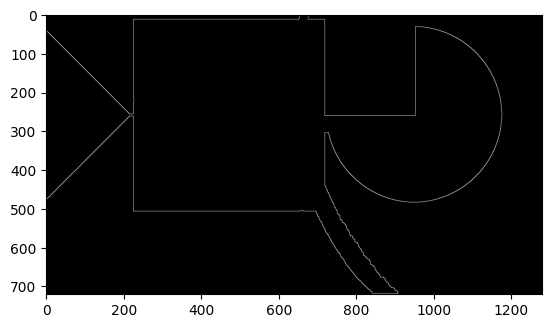

In [ ]:
resultados4 = MooreFree4(circle)

# Imprimir lista de direcciones8
print(resultados4[1])

# Mostrar imagen con bordes
plt.imshow(resultados4[0], cmap='gray')

## Mascaras

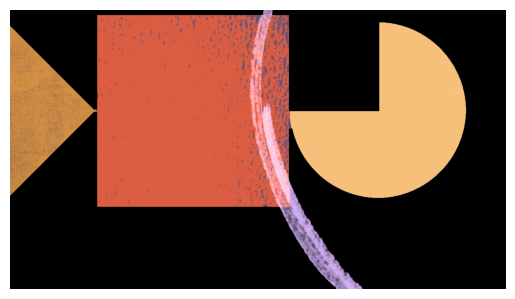

In [ ]:
# Mascara aplicada a imagen a color

# Inversa de binaria
for i in np.nditer(test1, op_flags=['readwrite']):
    i[...] = 255 - i

# Guardar y volver a abrir imagen binaria para que sea compatible con la imagen a color (en 3 canales)
cv2.imwrite("../../IMAGES/test1.jpg", test1)
base = cv2.imread('../../IMAGES/test1.jpg', 1)

# Aplicar mascara
masked3 = cv2.bitwise_and(base, circleC)

# Mostrar fusion
plt.axis("off")
plt.imshow(masked3, cmap='gray')